The approach to solve Schrödiger equation in this assignment is to utilize the known value of eigenvalue to test our iteration (using Numerov method) on corresponding eigenfunction. Once we successfully iterate the eigenfunction, we may determine eigenvalues using the root finding method and thus its eigenfunction.

In [158]:
# import python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The potential of the system and exact eigenvalues are given as follows:
$$V (x) = \frac{ℏ^2}{2m} \alpha^2 \lambda (\lambda - 1) [\frac {1}{2} - \frac {1}{cosh^2(\alpha x)}] $$

and

$$E_n=\frac{ℏ^2}{2m} \alpha^2 [ \frac{\lambda(\lambda - 1)}{2}-(\lambda-1-n)^2 ], n = 0, 1, 2, ...$$


In [159]:
# for simplicity we take both mass and angular planck constant equal to 1
m = 1
hbar = 1

In [160]:
# define the potential well 
def V(x,alpha = 1.0, Lambda = 4.0):

    return ((hbar**2.0)/2.0*m)*(alpha**2.0)*(Lambda)*(Lambda-1.0)*(0.5 - 1.0/(np.cosh(alpha*x))**2)

In quantum system, energy is quantised. We need to determine the allowed energy of the system. 

In [161]:
# define the function for exact eigenvalues 
def exact_E (n, alpha = 1, Lambda = 4):

    return (hbar/2*m)*(alpha**2)*(Lambda*(Lambda - 1)/2 - (Lambda - 1 - n)**2)

E = [exact_E(n) for n in range (10) 
     if exact_E (n) >= -3]

# the possible eigenvalues is given by
E_possible = pd.DataFrame ({'eigenvalues' : E})
print (E_possible)

   eigenvalues
0         -1.5
1          1.0
2          2.5
3          3.0
4          2.5
5          1.0
6         -1.5


Plot the graph of the potential with the allowed energy level 

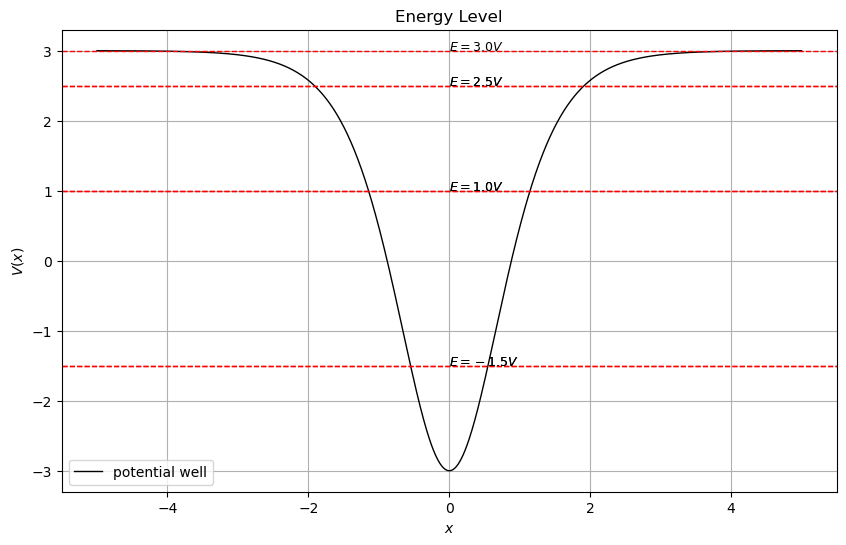

<Figure size 1200x600 with 0 Axes>

In [162]:
plt.figure(figsize = (10,6))

x = np.linspace (-5, 5, 1000)
plt.plot (x, V(x), color = 'black', linewidth = 1.0,  label = 'potential well' )

for energy in E: 
    plt.axhline (y = energy, color = 'r', linewidth = 1.0, linestyle = '--')
    plt.text(0, energy, f'$E = {energy} V$', fontsize =9)

plt.title ('Energy Level')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.legend ()
plt.grid()
plt.figure(figsize = (12,6))
plt.show()

The turning point is the interception point between $V(x)$ and arbitary allowed energy $E$. This point can be determined using secant method. for simplicity, we determine the turning point when $V(x) = 2.5 V$

In [163]:
# secant method
E_test = 2.5

def f (x, E):
    return V (x) - E

def secant_method (x0, x1, E, iter = 100, tol = 1e-6):

    for i in range (iter):
        x2 = x1 - f (x1,E)*(x1 - x0)/ (f(x1,E) - f(x0,E))

        if abs (x1 - x2) < tol: 
            break

        x0, x1 = x1, x2

        i+=1

    return i, x2

num_iteration, turning_point = secant_method (0,2, E_test)

print (f'number of iteration required : {num_iteration}\n turning point = {turning_point:.6f}' )

number of iteration required : 5
 turning point = 1.914084


We are ready to iterate the eigenfunction of the corresponding eigenvalues $(E = 2.5 V)$. We will be using Numerov method to evaluate the eigenfunction. The schrodinger equation is given by 


$$-\frac{ℏ^2}{2m}\frac{d^2 \psi}{dx^2}+ V (x) \psi = E \psi$$



rearrange the the equation

$$\frac{d^2 \psi}{dx^2} =-\frac{2m[E-V(x)]}{ℏ^2} \psi$$

let define $k^2(x) = \frac{2m[E-V(x)]}{ℏ^2}$, therefore we obtained,

$$\frac{d^2 \psi}{dx^2} =-k^2 \psi$$

Numerov method iterate the wavefunction as below:
$$\psi (x + h) = \frac{2\psi(x)(1 - \frac{5ℏ^2}{12} k^2 (x + h)) - \psi(x - h)(1 + \frac{ℏ^2}{12} k^2 (x - h))}{1 + \frac{ℏ^2}{12} k^2 (x + h)}$$

since energy is quantized, only wavefunction with the allowed energy is continous. This implies that 
$$\psi_r(x_r) = \psi_l (x_r)$$
$$\frac{d\psi_r(x_r)}{dx} = \frac{d\psi_l(x_r)}{dx}$$

the eigenfunction iterate to the left and to the right of the turning point must be matching each other smoothly. 

In [164]:
# range of x
x_range = (-5,5)

# def k_squared
def k_squared (x, E = E_test):

    return ((2*m)/(hbar**2))*(E  - V(x))


# definite numerov step
def numerov_step (x,psi_prev, psi_current,h):
     

    psi_next = (2*(psi_current*(1 - (5*h**2)*(k_squared(x)/12))) - (psi_prev*(1 + (h**2)*(k_squared(x - h))/12)))/(1 + (h**2)*(k_squared (x + h)/12))


    return psi_next

# evaluate the eigenfunction
def eigenfunction(x_start, h, E_guess, direction = 'left'):

    if direction == 'right':   # iterate to the right of turning point
        x_stop = x_range [1]
    
        x = np.arange(x_start, x_stop + h, + h)
 

    

    else:   # iterate to the left of turning point
        x_stop = x_range [0]

        x = np.arange(x_start, x_stop - h, - h)

    # create an array to evaluate eigenfunction on step x
    
    psi = np.zeros (len(x))

    psi [-1] = 0
    psi [-2] = 1e-10

    for i in range (1,len(x)-1):
        psi [-(i + 2)] = numerov_step(x[-i], psi [-i],psi [-(i+1)],h)

    return x, psi

x_right, Psi_right = eigenfunction (turning_point,0.01, E_test, direction = 'right')
x_left, Psi_left = eigenfunction (turning_point,0.01, E_test, direction = 'left')


plot the eigenfunction, $\psi (x)$ for $E = 2.5 V$

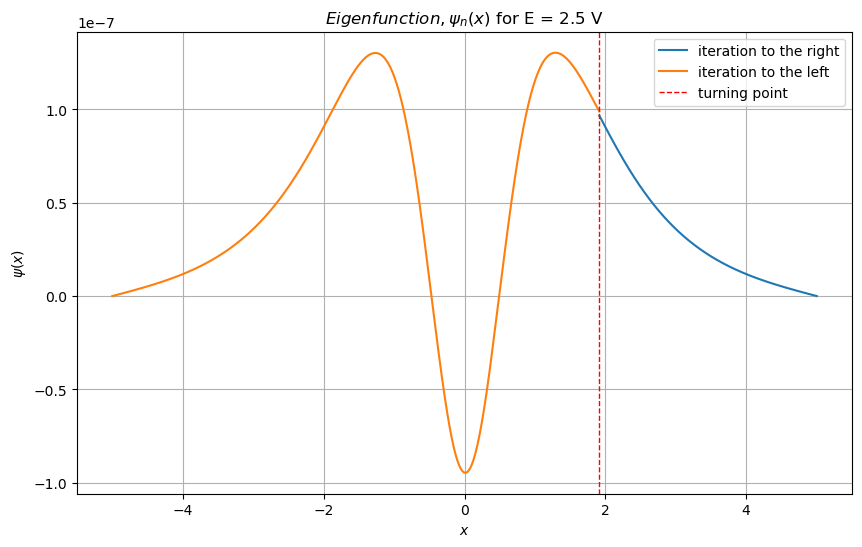

In [165]:
# graph plotting
plt.figure (figsize = (10,6))
plt.plot (x_right,Psi_right, label = 'iteration to the right')
plt.plot (x_left,Psi_left, label = 'iteration to the left')
plt.axvline (x = turning_point, color = 'r', linestyle = '--', linewidth = 1, label = 'turning point')
plt.xlabel ('$x$')
plt.ylabel ('$\psi (x)$')
plt.title ('$Eigenfunction,  \psi_n (x)$ for E = 2.5 V')
plt.legend ()
plt.grid ()
plt.show ()

Using a known eigenvalue, we have tested that our approach to iterate the eigenfunction using numerov method is working. We can determine the eigenfuction using formula 

$$F(E)=\frac {[\psi_l (x_r + h) - \psi_l (x_r - h)] - [\psi_r (x_r + h) - \psi_r (x_r - h)]}{2h\psi (x_r)}$$

By keeping $x = x_r$ (first turning point),  $\psi_l$ and $\psi_r$ are function of $E$, thus the left hand side is a fucntion of $E$.  $F(E) = 0 $ only if when E is equal to eigenvalue. Therefore, we can apply secant method to determine the root of $F (E)$, which the eigenvalues.

In [166]:
# define F (E) 
def F (E_guess, h = 0.01):

    turning_point = secant_method (0,2, E_guess)[1]

    x_left, psi_left = eigenfunction(turning_point + h, h, E_guess, 'left')
    x_right, psi_right = eigenfunction (turning_point - h, h, E_guess, 'right')

    return ((psi_left [0] - psi_left [2]) - (psi_right [2]- psi_right [0]))/(2*h*psi_left [1])



# perform secant method
def secant (E0,E1,iter = 100, tol = 1e-6):

    for i in range (iter):

        E2 = E1 - F (E1)*(E1 - E0)/ (F(E1) - F(E0))

        if abs (E1 - E2) < tol: 
            break

        E0, E1 = E1, E2

        i+=1

    return i, E2

num_iteration, eigenvalue = secant (1, 2)

print(f'number of iteration: {num_iteration}\n eigenvalues = {eigenvalue} V')


number of iteration: 11
 eigenvalues = 2.4966306665744775 V


After approximating the eigenvalues, we may determine the coresponding eigenfunction using numerov method as we did in the earlier discussion. 

In [170]:
turning_point = secant_method (0,2, eigenvalue)

x_right, psi_right = eigenfunction (turning_point,0.01, eigenvalue, direction = 'right')
x_left, psi_left = eigenfunction (turning_point,0.01, eigenvalue, direction = 'left')

# graph plotting
plt.figure (figsize = (10,6))
plt.plot (x_right,psi_right, label = 'iteration to the right')
plt.plot (x_left,psi_left, label = 'iteration to the left')
plt.axvline (x = turning_point, color = 'r', linestyle = '--', linewidth = 1, label = 'turning point')
plt.axvline (x = turning_point, color = 'r', linestyle = '--', linewidth = 1)
plt.title ('$Eigenfunction,  \psi_n (x)$')
plt.legend ()
plt.xlabel ('$x$')
plt.ylabel ('$\psi (x)$')
plt.grid ()
plt.show ()



TypeError: unsupported operand type(s) for -: 'float' and 'tuple'